# Machine Learning

**Objective**: Predicting property sold price from HouseSigma


In [15]:
import pandas as pd
import numpy as np
import datetime

In [28]:
df = pd.read_csv('2020_HouseSigma_listing_details_JUST_SOLD.csv')

In [29]:
df.columns

Index(['Listing_num', 'Address', 'Community', 'House_type', 'Listing_price',
       'Sigma_estimate', 'Estimated_on', 'Sold_price', 'Bedroom', 'Washroom',
       'Parking', 'Tax', 'Property_type', 'Maintenance', 'Building_age',
       'Size', 'Basement', 'Utility_incl', 'Days_on_market', 'Rental_dom',
       'Listed_on', 'Updated_on', 'Rental_estimate', 'Rental_yield',
       'Major_intersection', 'Amenities', 'Exposure', 'Municipality',
       'Description'],
      dtype='object')

In [ ]:
#df.shape[0]

In [25]:
pd.set_option('display.max_columns', None)
# df.head(30)

In [30]:
# Removing special characters & words
df['Days_on_market'] = df['Days_on_market'].replace(' days', '', regex=True)
df['Size'] = df['Size'].str.replace(' (SigmaEstimate®)', '', regex=False).replace(' feet²', '', regex=True)
df['Maintenance'] = df['Maintenance'].replace('/month', '', regex = True).replace('[\$,)]', '', regex = True)
df['Tax'] = df['Tax'].replace('[\$,)]', '', regex = True)
df['Rental_dom'] = df['Rental_dom'].str.replace(' day(s)', '', regex=False)
df['Rental_yield'] =df['Rental_yield'].replace('%', '', regex = True)
df[['Listing_price', 'Sigma_estimate', 'Sold_price', 'Rental_estimate']] = \
df[['Listing_price', 'Sigma_estimate', 'Sold_price', 'Rental_estimate']].replace('[\$,)]', '', regex = True)


# Removing some words
df['Bedroom'] = df['Bedroom'].str.replace(' Bedrooms', '', regex=False)
df['Washroom'] = df['Washroom'].str.replace(' Bathrooms', '', regex=False)
df['Parking'] = df['Parking'] = df['Parking'].str.replace(' Garage', '', regex=False)

# To capitalize all letters in the series
df['Exposure'] = df['Exposure'].str.upper()

# set a cell to NaN in a pandas dataframe
df[['Estimated_on', 'Building_age']] = df[['Estimated_on', 'Building_age']].replace('-', np.NaN)
df['Basement'] = df['Basement'].replace('None', np.NaN)

In [31]:
# coercing into numeric objects
df['Maintenance'] = pd.to_numeric(df['Maintenance'], errors='coerce')
df['Tax'] = pd.to_numeric(df['Tax'], errors='coerce')
df['Days_on_market'] = pd.to_numeric(df['Days_on_market'], errors='coerce')
df['Rental_dom'] = pd.to_numeric(df['Rental_dom'], errors='coerce')
df['Listing_price'] = pd.to_numeric(df['Listing_price'], errors='coerce')
df['Sigma_estimate'] = pd.to_numeric(df['Sigma_estimate'], errors='coerce')
df['Sold_price'] = pd.to_numeric(df['Sold_price'], errors='coerce')
df['Rental_estimate'] = pd.to_numeric(df['Rental_estimate'], errors='coerce')
df['Rental_yield'] = pd.to_numeric(df['Rental_yield'], errors='coerce')


# Identifying incorrect size categories
index_581 = df[df['Size'] == '581'].index
index_900 = df[df['Size'] == '900'].index
index_1300 = df[df['Size'] == '1300'].index
index_br_0 = df[df['Bedroom'] == '0+1'].index

# Changing 900 into 900-999
df.loc[index_581, 'Size'] = '500-599'
df.loc[index_900, 'Size'] = '900-999'
df.loc[index_1300, 'Size'] = '1200-1399'
df.loc[index_br_0, 'Bedroom'] = '0'

# To change string dates into datetime objects
# [Listed_on, Estimated_on, Updated_on]

df['Estimated_on'] = pd.to_datetime(df['Estimated_on'], format = '%Y-%m-%d')
df['Listed_on'] = pd.to_datetime(df['Listed_on'], format = '%Y-%m-%d')
df['Updated_on'] = pd.to_datetime(df['Updated_on'], format = '%Y-%m-%d')

# Changing intersection symbols
df['Major_intersection'] = df['Major_intersection']\
.replace('/', '&', regex = True)\
.replace('And', '&', regex = True)\
.replace(' & ', '&', regex = True)\
.replace('&', ' & ', regex = True)

In [ ]:
df.groupby('Parking')['Major_intersection'].count()

In [33]:
# # Renaming columns with units
# df.rename(columns={'Listing_price': 'Listing_price ($)',\
#                    'Sigma_estimate': 'Sigma_estimate ($)',\
#                    'Sold_price': 'Sold_price ($)',\
#                    'Tax': 'Tax ($)',\
#                    'Maintenance': 'Maintenance ($/month)',\
#                    'Size': 'Size (feet²)',\
#                    'Rental_dom':'Rental_days_on_market',\
#                    'Rental_estimate': 'Rental_estimate ($)',\
#                    'Rental_yield':'Rental_yield (%)'
#                   })

In [32]:
df.to_csv('HouseSigma_ml_dataset.csv', index = False)

# Machine Learning

List of variables
- Listing_num:
- Address: 
- Community: 
- House_type: 
- Listing_price:
- Sigma_estimate: 
- Estimated_on: 
- Sold_price: 
- Bedroom: 
- Washroom:
- Parking: 
- Tax: 
- Property_type: 
- Maintenance: 
- Building_age:
- Size: 
- Basement: 
- Utility_incl: 
- Date_on_market: 
- Rental_dom:
- Listed_on: 
- Updated_on: 
- Rental_estimate: 
- Rental_yield:
- Major_intersection: 
- Amenities: 
- Exposure: 
- Municipality:
- Description- 

In [93]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
#import dataframe
df = pd.read_csv('HouseSigma_ml_dataset.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Listing_num         273 non-null    object 
 1   Address             273 non-null    object 
 2   Community           273 non-null    object 
 3   House_type          273 non-null    object 
 4   Listing_price       272 non-null    float64
 5   Sigma_estimate      270 non-null    float64
 6   Estimated_on        270 non-null    object 
 7   Sold_price          272 non-null    float64
 8   Bedroom             273 non-null    object 
 9   Washroom            273 non-null    int64  
 10  Parking             273 non-null    int64  
 11  Tax                 261 non-null    float64
 12  Property_type       273 non-null    object 
 13  Maintenance         242 non-null    float64
 14  Building_age        124 non-null    object 
 15  Size                273 non-null    object 
 16  Basement

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D166D04850>,
      dtype=object)

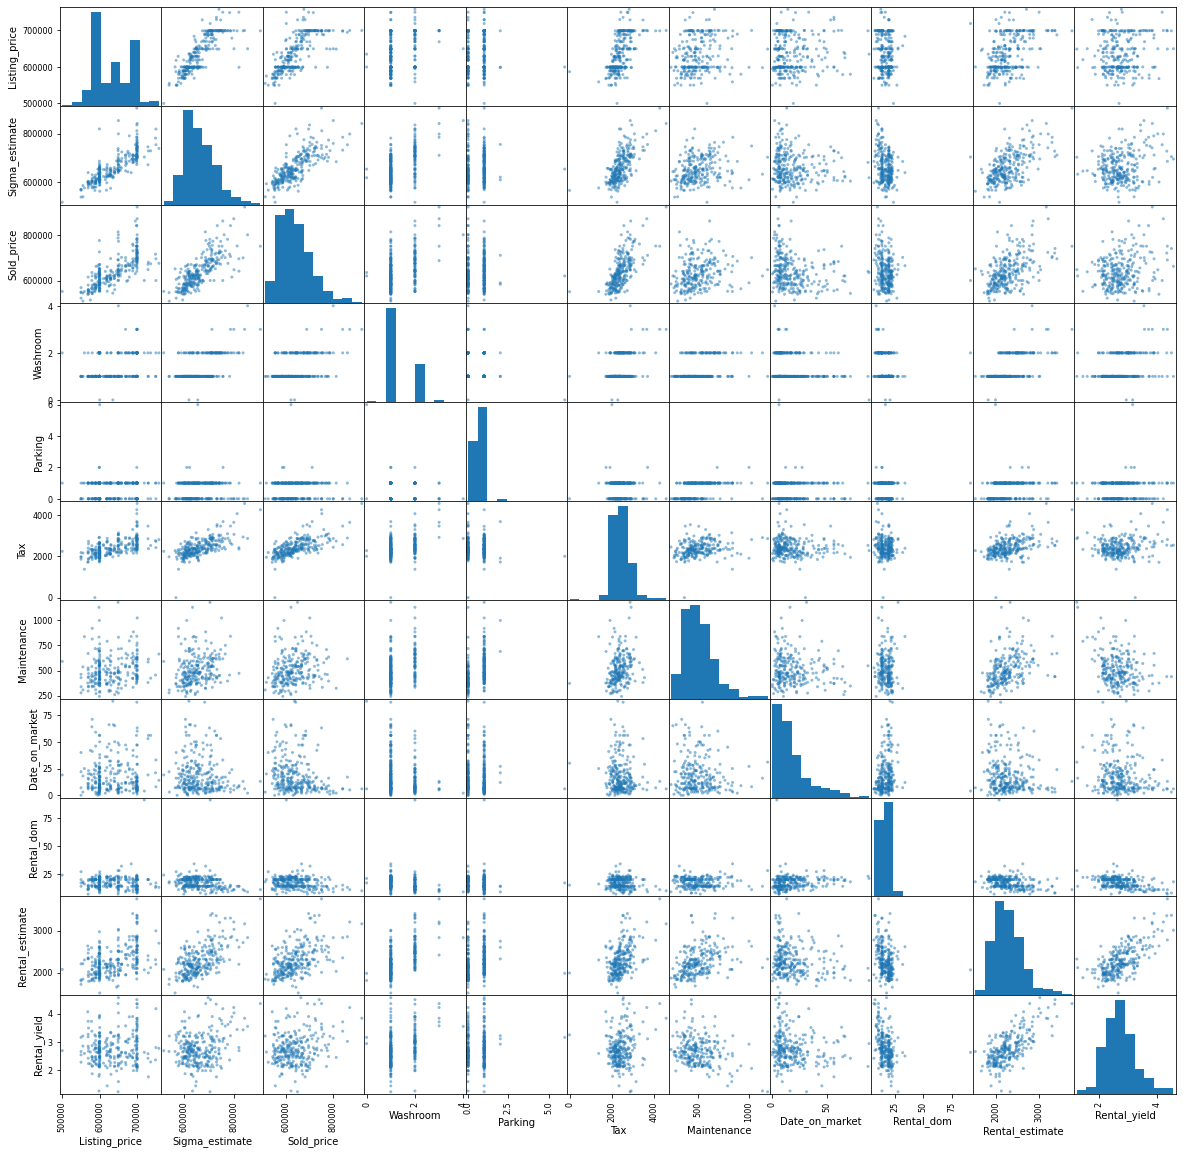

In [4]:
pd.plotting.scatter_matrix(df, figsize=(20,20)) #diagonal plots show data distribution

In [227]:
# Return columns that have numerical value
df = df.select_dtypes(include = ['float64'])

In [228]:
df.columns

Index(['Listing_price', 'Sigma_estimate', 'Sold_price', 'Tax', 'Maintenance',
       'Rental_dom', 'Rental_estimate', 'Rental_yield'],
      dtype='object')

In [65]:
df.shape

(228, 8)

In [117]:
# Remove rows with NaN values
df = df.dropna()
df.shape

(228, 8)

For df[[colname(s)]], the interior brackets are for list, and the outside brackets are indexing operator, i.e. you must use double brackets if you select two or more columns. With one column name, single pair of brackets returns a Series, while double brackets return a dataframe.

In [207]:
from sklearn.model_selection import train_test_split
# provide a dataframe of all numerica variables you want to include for X
# provide a series of target variable
# 'Listing_price', 'Tax', 'Maintenance', 'Rental_estimate', 'Rental_yield'


X = df[['Tax']]
y = df['Sold_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 2020)

In [208]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(228, 1)
(159, 1)
(69, 1)


## Linear Regression
### Train a model
Let's now train a model

In [206]:
# omport linear repression from scikitlearn
from sklearn.linear_model import LinearRegression

#instantiate it
lr = LinearRegression()

In [190]:
# now train the model
lr.fit(X_train, y_train)

LinearRegression()

In [137]:
lr.coef_ # theta1, slope

array([ 0.60004873, 43.01403259, -4.48365959, 45.51277025])

In [138]:
lr.intercept_ #theta0, bias

48541.749267463805

### Make predictions
Now making predictions and evaluate the performance of the model on the test set

In [111]:
from sklearn.metrics import mean_squared_error, r2_score

In [131]:
y_pred = lr.predict(X_test)

In [191]:
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [192]:
print(mse_test)
print(r2_test)

1376635355.330086
0.6309307089724421


In [193]:
X_test.values[:,0]

array([2369., 2309., 2869., 2057., 2393., 2720., 1889., 2021., 2315.,
       2027., 2600., 2351., 2363., 1853., 2417., 2565., 2866., 2447.,
       2237., 2534., 2308., 2699., 2249., 2231., 2189., 2843., 2872.,
       2736., 2327., 1769., 2141., 2081., 2183., 3088., 2543., 2663.,
       1907., 2511., 2567., 2069., 2861., 1739., 2519., 2243., 2321.,
       2333., 1962., 3529., 1900., 2621., 2243., 2065., 2555., 2304.,
       1823., 2147., 2309., 3449., 2120., 2728., 2195., 2339., 2342.,
       2621., 2033., 2119., 2681., 2725., 2219.])

In [159]:
y_test.values

array([655000., 667000., 690000., 580000., 630000., 556000., 580000.,
       610000., 662000., 572000., 550000., 715500., 620000., 560000.,
       661000., 590000., 613500., 570000., 547000., 720000., 730000.,
       620000., 605000., 585000., 560000., 700000., 780000., 812500.,
       579900., 585000., 620000., 619500., 560000., 780000., 692000.,
       642000., 590000., 600000., 753425., 585000., 645000., 555000.,
       608000., 643000., 622000., 553000., 572000., 688000., 650000.,
       590300., 575000., 599000., 675000., 645000., 580000., 596800.,
       580000., 699900., 595000., 720000., 590000., 630000., 550000.,
       625000., 590000., 612000., 650000., 695000., 641000.])

In [148]:
X_test.values.shape

(69, 4)

In [149]:
y_pred_test.shape

(69,)

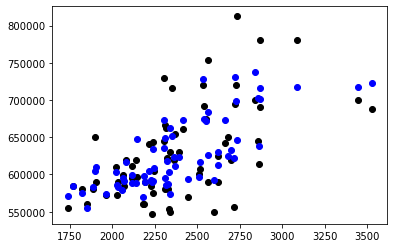

In [194]:
plt.scatter(X_test.values[:,0], y_test.values, color='black') #shows actual values
plt.plot(y_pred_test, y_pred_test, color='blue', linewidth=3) # predictions

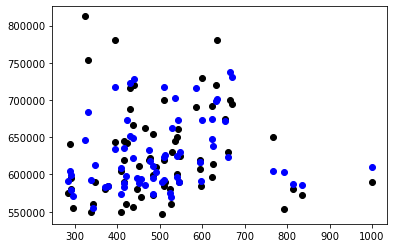

In [188]:
plt.scatter(X_test.values[:,1], y_test.values, color='black') #shows actual values
plt.scatter(X_test.values[:,1], y_pred_test, color='blue') # prections

In [236]:
def get_lr_mse_r2(df, list_features):
    X = df[list_features]
    y = df['Sold_price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2020)
    
    #instantiate and fit
    lr = LinearRegression()
    lr.fit(X, y)
    
    # coefficients & bias
    coeff = lr.coef_
    y_int = lr.intercept_
    print("Coefficient(s): ", coeff)
    print("Bias: ", y_int)
    
    # making predictions
    y_pred = lr.predict(X_test)
    
    # metrics of performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("MSE: ", mse)
    print("R2: ", r2)
    
    # plot
    plt.scatter(y_pred, y_test.values, color='black',)
    plt.plot(y_test.values, y_test.values, color='red', linewidth=3)

    # Create an empty dict
    dict_ = dict()
    # Populate dicitonary
    dict_['Features'] = list_features
    dict_['MSE'] = mse
    dict_['R2'] = r2
    dict_['Coefficient(s)'] = coeff
    dict_['Bias'] = y_int
    
    return dict_

Coefficient(s):  [  0.67038521  39.4485254  -13.12266801  39.40129511]
Bias:  30899.797526078182
MSE:  1313967402.572227
R2:  0.647731684484905


{'Features': ['Listing_price', 'Tax', 'Maintenance', 'Rental_estimate'],
 'MSE': 1313967402.572227,
 'R2': 0.647731684484905,
 'Coefficient(s)': array([  0.67038521,  39.4485254 , -13.12266801,  39.40129511]),
 'Bias': 30899.797526078182}

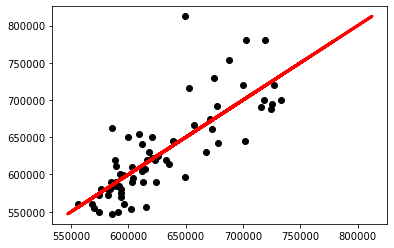

In [237]:
get_lr_mse_r2(df, ['Listing_price', 'Tax', 'Maintenance', 'Rental_estimate'])

In [239]:
#get_lr_mse_r2(df, ['Listing_price', 'Tax', 'Maintenance', 'Rental_estimate', 'Rental_yield'])

In [240]:
#get_lr_mse_r2(df, ['Listing_price'])

In [241]:
#get_lr_mse_r2(df, ['Tax'])

In [242]:
#get_lr_mse_r2(df, ['Maintenance'])

In [243]:
#get_lr_mse_r2(df, ['Listing_price', 'Tax'])

In [244]:
#get_lr_mse_r2(df, ['Listing_price', 'Maintenance'])

Coefficient(s):  [  0.67038521  39.4485254  -13.12266801  39.40129511]
Bias:  30899.797526078182
MSE:  1313967402.572227
R2:  0.647731684484905


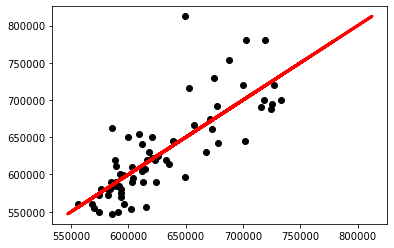

In [248]:
dict_all = get_lr_mse_r2(df, ['Listing_price', 'Tax', 'Maintenance', 'Rental_estimate'])

In [249]:
dict_all

{'Features': ['Listing_price', 'Tax', 'Maintenance', 'Rental_estimate'],
 'MSE': 1313967402.572227,
 'R2': 0.647731684484905,
 'Coefficient(s)': array([  0.67038521,  39.4485254 , -13.12266801,  39.40129511]),
 'Bias': 30899.797526078182}

<BarContainer object of 4 artists>

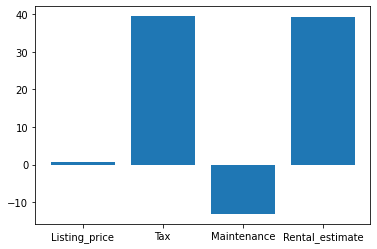

In [253]:
plt.bar(x = 'Features', height= 'Coefficient(s)', data = dict_all)

In [255]:
pd.Series(data=dict_all['Coefficient(s)'], index=dict_all['Features']).sort_values().plot('bar')

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.

In [259]:
df.describe()

,Listing_price,Sigma_estimate,Sold_price,Tax,Maintenance,Rental_dom,Rental_estimate,Rental_yield
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,631996.105263,651965.083333,629741.526316,2358.508772,516.206140,17.539474,2256.149123,2.640570
std,48267.628677,51733.076729,60555.177039,373.045420,152.838536,4.377880,322.169962,0.481566
min,499888.000000,516602.000000,515000.000000,1.000000,241.000000,7.000000,1650.000000,1.230000
25%,599000.000000,611472.000000,583125.000000,2147.000000,414.750000,14.000000,2007.500000,2.325000
50%,619900.000000,645280.500000,620000.000000,2328.500000,483.500000,18.000000,2200.000000,2.620000
75%,679000.000000,691591.500000,665500.000000,2568.500000,595.000000,20.000000,2454.500000,2.880000
max,758000.000000,819690.000000,860000.000000,3529.000000,1181.000000,34.000000,3409.000000,4.500000


### Data Scaling

In [261]:
# Split then scale data
df_train, df_test = train_test_split(df, test_size = 0.3, random_state=2020)

In [262]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate scaler
scaler = MinMaxScaler()
# from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler

In [263]:
X_train_scaled = scaler.fit_transform(df_train.drop(columns = 'Sold_price'))
X_test_scaled = scaler.transform(df_test.drop(columns = 'Sold_price')) # fit should only apply in the training set
y_train = df_train['Sold_price']
y_test = df_test['Sold_price']

In [ ]:
# train a Ridge Regression model on unscaled data
# Get the MSE
# Scale the features using MinMiza Scaler

from sklearn.linear_model import Ridge
X

In [265]:
# Train a new Ridge Regression model on the scaled data
# Get the MSE